<a href="https://colab.research.google.com/github/Govind216/Football-Data-Visualization/blob/main/DV_REVIEW2_shotmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install highlight_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from highlight_text import fig_text
from matplotlib.patches import Arc
import numpy as np

<a id="3."></a>
# Scraping Isak's career shots
Let's start first by scraping using BS4 the career shots made by Aleksander Isak and then proceed to change their data types to be able to manipulate them later: 

In [ ]:
# Entering Aleksander Isak ID link
link = "https://understat.com/player/5232"
res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')
# Get the grouped stats data, it's the second script executed in order
strings = scripts[3].string
# Getting rid of unnecessary characters from json data
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

In [ ]:
shots = pd.DataFrame(data) # Aleksander Isak shot data
# Changing data type
shots['xG'] = shots['xG'].astype('float64')
shots['X'] = shots['X'].astype('float64')
shots['Y'] = shots['Y'].astype('float64')

In [ ]:
# Setting dimensions, colour, orientation of football pitch
def football_pitch(x_min=0, x_max=105,
               y_min=0, y_max=68,
               pitch_color="#f0f0f0",
               line_color='black',
               line_thickness=1.5,
               point_size=20,
               orientation="horizontal",
               aspect="full",
               axis='off',
               ax=None
               ):

    if not ax:
        raise TypeError("This function is intended to be used with an existing fig and ax in order to allow flexibility in plotting of various sizes and in subplots.")


    if orientation.lower().startswith("h"):
        first = 0
        second = 1
        arc_angle = 0

        if aspect == "half":
            ax.set_xlim(x_max / 2, x_max + 5)

    elif orientation.lower().startswith("v"):
        first = 1
        second = 0
        arc_angle = 90

        if aspect == "half":
            ax.set_ylim(x_max / 2, x_max + 5)

    
    else:
        raise NameError("You must choose one of horizontal or vertical")
    
    ax.axis(axis)

    rect = plt.Rectangle((x_min, y_min),
                         x_max, y_max,
                         facecolor=pitch_color,
                         edgecolor="none",
                         zorder=-2)

    ax.add_artist(rect)

    x_conversion = x_max / 100
    y_conversion = y_max / 100

    pitch_x = [0,5.8,11.5,17,50,83,88.5,94.2,100] # x dimension markings
    pitch_x = [x * x_conversion for x in pitch_x]

    pitch_y = [0, 21.1, 36.6, 50, 63.2, 78.9, 100] # y dimension markings
    pitch_y = [x * y_conversion for x in pitch_y]

    goal_y = [45.2, 54.8] # goal posts
    goal_y = [x * y_conversion for x in goal_y]

    # side and goal lines
    lx1 = [x_min, x_max, x_max, x_min, x_min]
    ly1 = [y_min, y_min, y_max, y_max, y_min]

    # outer box
    lx2 = [x_max, pitch_x[5], pitch_x[5], x_max]
    ly2 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

    lx3 = [0, pitch_x[3], pitch_x[3], 0]
    ly3 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

    # goals
    lx4 = [x_max, x_max+2, x_max+2, x_max]
    ly4 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

    lx5 = [0, -2, -2, 0]
    ly5 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

    # 6 yard box
    lx6 = [x_max, pitch_x[7], pitch_x[7], x_max]
    ly6 = [pitch_y[2],pitch_y[2], pitch_y[4], pitch_y[4]]

    lx7 = [0, pitch_x[1], pitch_x[1], 0]
    ly7 = [pitch_y[2],pitch_y[2], pitch_y[4], pitch_y[4]]


    # Halfline, penalty spots, and kickoff spot
    lx8 = [pitch_x[4], pitch_x[4]]
    ly8 = [0, y_max]

    lines = [
        [lx1, ly1],
        [lx2, ly2],
        [lx3, ly3],
        [lx4, ly4],
        [lx5, ly5],
        [lx6, ly6],
        [lx7, ly7],
        [lx8, ly8],
        ]

    points = [
        [pitch_x[6], pitch_y[3]],
        [pitch_x[2], pitch_y[3]],
        [pitch_x[4], pitch_y[3]]
        ]

    circle_points = [pitch_x[4], pitch_y[3]]
    arc_points1 = [pitch_x[6], pitch_y[3]]
    arc_points2 = [pitch_x[2], pitch_y[3]]


    for line in lines:
        ax.plot(line[first], line[second],
                color=line_color,
                lw=line_thickness,
                zorder=-1)

    for point in points:
        ax.scatter(point[first], point[second],
                   color=line_color,
                   s=point_size,
                   zorder=-1)

    circle = plt.Circle((circle_points[first], circle_points[second]),
                        x_max * 0.088,
                        lw=line_thickness,
                        color=line_color,
                        fill=False,
                        zorder=-1)

    ax.add_artist(circle)

    arc1 = Arc((arc_points1[first], arc_points1[second]),
               height=x_max * 0.088 * 2,
               width=x_max * 0.088 * 2,
               angle=arc_angle,
               theta1=128.75,
               theta2=231.25,
               color=line_color,
               lw=line_thickness,
               zorder=-1)

    ax.add_artist(arc1)

    arc2 = Arc((arc_points2[first], arc_points2[second]),
               height=x_max * 0.088 * 2,
               width=x_max * 0.088 * 2,
               angle=arc_angle,
               theta1=308.75,
               theta2=51.25,
               color=line_color,
               lw=line_thickness,
               zorder=-1)

    ax.add_artist(arc2)

    ax.set_aspect("equal")

    return ax

Let's take draw our first pitch with the axis on the see the full dimensions : 

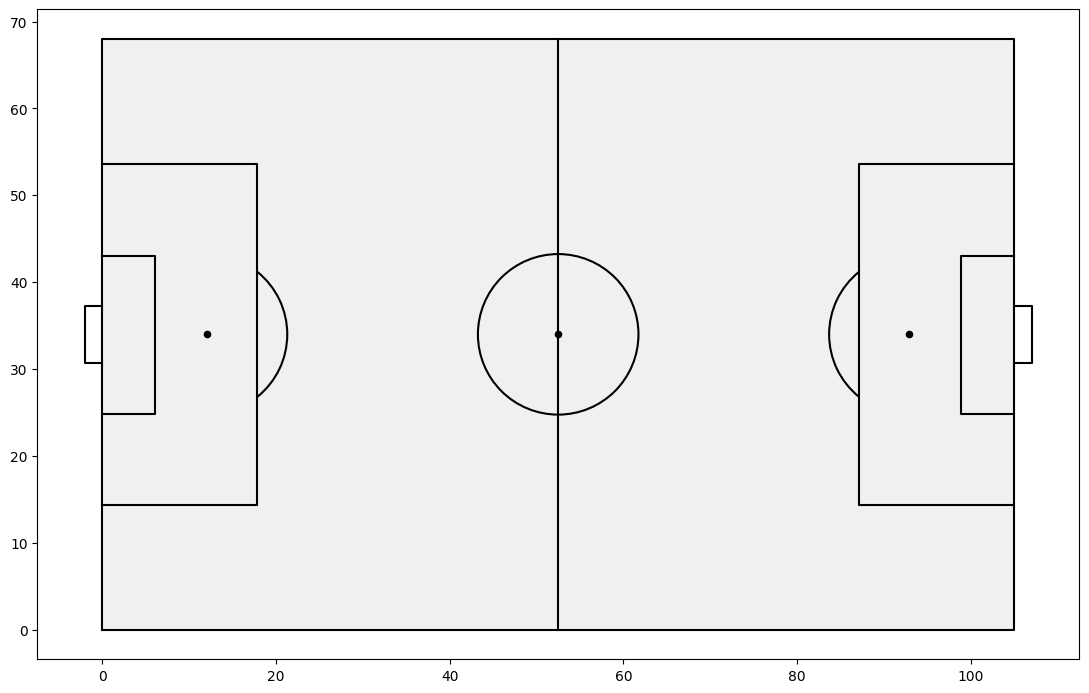

In [ ]:
fig, ax = plt.subplots(figsize=(11, 7))
#Drawing a full pitch horizontally
football_pitch(orientation="horizontal",aspect="full",line_color="black",ax=ax,axis='on')
plt.tight_layout()

Notice how the measurements the field are 105x68 so we are forced to adapt the Understat data to the field measurements

<a id="5."></a>
# Adjusting to pitch dimensions and creating dictionaries
Understat data is measured at 100x100 , therefore it is imperative to adapt Understat's dimensions to our pitch and also keep in mind that the X and Y column values are between 0 and 1 so let's multiply by 100 : 

In [ ]:
shots['X1'] = (shots['X']/100)*105*100
shots['Y1'] = (shots['Y']/100)*68*100
# Original X and Y
shots['X'] = (shots['X']/100)*105*100
shots['Y'] = (shots['Y']/100)*68*100

Now let's create some dictionaries to use them later as text for the shotmaps, it's definitely easier tham calling them as series or series values such as " shots[shots['result']=='ShotOnPost']["xG"].values " for instance.

In [ ]:
# New dictionaries 
total_shots = shots[shots.columns[0]].count().tolist()
xGcum = np.round(max(np.cumsum(shots['xG'])),3).tolist()
xG_per_shot = np.round(max(np.cumsum(shots['xG']))/(shots[shots.columns[0]].count()),3).tolist()
goal = shots[shots['result']=='Goal']
shot_on_post = shots[shots['result']=='ShotOnPost']
blocked_shot = shots[shots['result']=='BlockedShot']
saved_shot = shots[shots['result']=='SavedShot']
missed_shot = shots[shots['result']=='MissedShot']
goals = goal[goal.columns[0]].count().tolist()

<a id="6."></a>
# Shootmap : Alexander Isak career shots
Now that we are all set, let's plot the career shots by Aleksander Isak , in order to represent the xG quality shots, if the shot was high quality , it'll be represent it bigger in the pitch : 

<ipython-input-9-220218e6dc15>:21: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [500]
<ipython-input-9-220218e6dc15>:22: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [500]
<ipython-input-9-220218e6dc15>:23: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[2]._sizes = [500]
<ipython-input-9-220218e6dc15>:24: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[3]._sizes = [500]
<ipython-input-9-220218e6dc15>:25: M

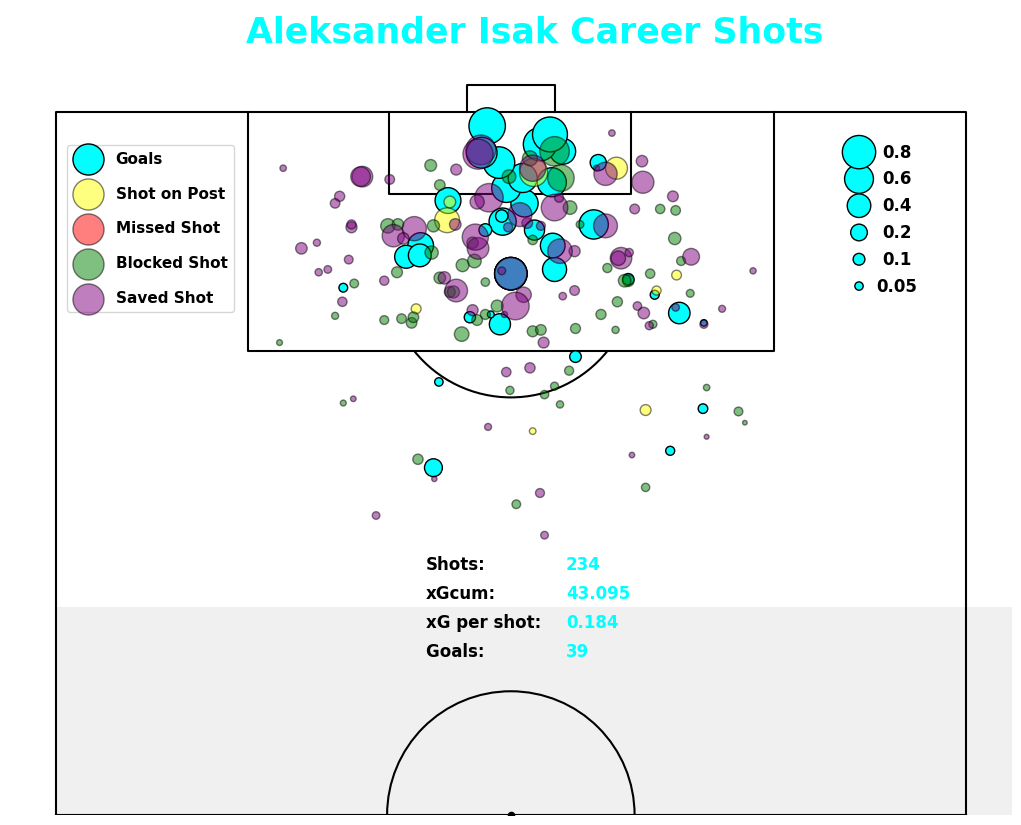

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
football_pitch(orientation="vertical",aspect="half",line_color="black",ax=ax,axis="off")

#Drawing a full pitch horizontally
z = goal['xG'].tolist()
z1 = [500 * i for i in z] # This is to scale the "xG" values for plotting
color = {'Goal':'cyan', 'MissedShots':'red', 'BlockedShot':'tomato', 'SavedShot':'black', 'ShotOnPost':'Yellow'}
## markers = {'Goal':'Star', 'MissedShots':'X', 'BlockedShot':'O', 'SavedShot':'V', 'ShotOnPost':'S'}

# Plotting the goals, the missed chances shot on post etc 
plt.scatter(y=goal["X1"],x=goal["Y1"],s=goal['xG']*720, marker='o',color='cyan',edgecolors="black",label='Goals')
plt.scatter(y=shot_on_post["X1"],x=shot_on_post["Y1"],s=shot_on_post['xG']*720, marker='o',color='yellow',edgecolors="black",label='Shot on Post',alpha=0.5)
plt.scatter(y=missed_shot["X1"],x=missed_shot["Y1"],s=missed_shot['xG']*720, marker='o',color='red',edgecolors="black",label='Missed Shot',alpha=0.5)
plt.scatter(y=blocked_shot["X1"],x=blocked_shot["Y1"],s=blocked_shot['xG']*720, marker='o',color='green',edgecolors="black",label='Blocked Shot',alpha=0.5)
plt.scatter(y=saved_shot["X1"],x=saved_shot["Y1"],s=saved_shot['xG']*720, marker='o',color='purple',edgecolors="black",label='Saved Shot',alpha=0.5)
#legend 
# another way to do it 
#ax.legend(loc='upper center', bbox_to_anchor= (0.13, 0.87),
            #borderaxespad=0, frameon=False)
legend = ax.legend(loc="upper center",bbox_to_anchor= (0.14, 0.88),labelspacing=1.3,prop={'weight':'bold','size':11})
legend.legendHandles[0]._sizes = [500]
legend.legendHandles[1]._sizes = [500]
legend.legendHandles[2]._sizes = [500]
legend.legendHandles[3]._sizes = [500]
legend.legendHandles[4]._sizes = [500]

# xG Size 
mSize = [0.05,0.10,0.2,0.4,0.6,0.8]
mSizeS = [720 * i for i in mSize]
mx = [60,60,60,60,60,60]
my = [92,94,96,98,100,102]
plt.scatter(mx,my,s=mSizeS,facecolors="cyan", edgecolor="black")
for i in range(len(mx)):
    plt.text(mx[i]+ 2.8, my[i], mSize[i], fontsize=12, color="black",ha="center", va="center",fontweight='bold')
# Annotation text
fig_text(0.38,0.91, s="Aleksander Isak Career Shots\n", fontsize = 25, fontweight = "bold",c='cyan')
fig_text(0.47,0.37, s="Shots:\n\nxGcum:\n\nxG per shot:\n\nGoals: ", fontsize = 12, fontweight = "bold",c='black')
fig_text(0.54,0.37, s="<{}\n\n{}\n\n{}\n\n{}>".format(total_shots,xGcum,xG_per_shot,goals), fontsize = 12, fontweight = "bold",c='cyan')

<a id="7."></a>
# Aleksander Isak Goals and missed shots
Let's go ahead now and represent Isak's career goals using the same premises as the shotmap above:

In [ ]:
head = goal[goal['shotType']=='Head']
left_foot = goal[goal['shotType']=='LeftFoot']
right_foot = goal[goal['shotType']=='RightFoot']
head = head[head.columns[0]].count().tolist()
right_foot = right_foot[right_foot.columns[0]].count().tolist()
left_foot = left_foot[left_foot.columns[0]].count().tolist()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
football_pitch(orientation="vertical",aspect="half",line_color="black",ax=ax,axis="off")

#Drawing a full pitch horizontally
z = goal['xG'].tolist()
z1 = [500 * i for i in z] # This is to scale the "xG" values for plotting
colors = {'Goal':'cyan', 'MissedShots':'red', 'BlockedShot':'tomato', 'SavedShot':'black', 'ShotOnPost':'Yellow'}
## markers = {'Goal':'Star', 'MissedShots':'X', 'BlockedShot':'O', 'SavedShot':'V', 'ShotOnPost':'S'}

# Plotting the goals, the missed chances shot on post etc 
plt.scatter(y=goal[goal['shotType']=='Head']['X1'],x=goal[goal['shotType']=='Head']['Y1'],s=goal[goal['shotType']=='Head']['xG']*720, marker='o',color='cyan',edgecolors="black",label='Head')
plt.scatter(y=goal[goal['shotType']=='LeftFoot']['X1'],x=goal[goal['shotType']=='LeftFoot']['Y1'],s=goal[goal['shotType']=='LeftFoot']['xG']*720, marker='o',color='tomato',edgecolors="black",label='Left Foot')
plt.scatter(y=goal[goal['shotType']=='RightFoot']['X1'],x=goal[goal['shotType']=='RightFoot']['Y1'],s=goal[goal['shotType']=='RightFoot']['xG']*720, marker='o',color='yellow',edgecolors="black",label='Right Foot')

# xG Size
mSize = [0.05,0.10,0.2,0.4,0.6,0.8]
mSizeS = [720 * i for i in mSize]
mx = [60,60,60,60,60,60]
my = [92,94,96,98,100,102]
plt.scatter(mx,my,s=mSizeS,facecolors="cyan", edgecolor="black")
for i in range(len(mx)):
    plt.text(mx[i]+ 2.5, my[i], mSize[i], fontsize=12, color="black",ha="center", va="center",fontweight='bold')

# Pitch map text
fig_text(0.38,0.91, s="Aleksander Isak Career Goals\n", fontsize = 25, fontweight = "bold",c='cyan')
fig_text(0.47,0.37, s="Goals:\n\nRight Foot:\n\nLeft Foot:\n\nHead: ", fontsize = 15, fontweight = "bold",c='black')
fig_text(0.54,0.37, s=" <{}>\n\n <{}>\n\n < {}>\n\n  <{}>".format(goals,right_foot,left_foot,head), fontsize = 15, fontweight = "light",highlight_textprops=[{"color":'cyan'}, {'color':"yellow"}, {'color':"tomato"}, {'color':"cyan"}])

# Legend
legend = ax.legend(loc="upper center",bbox_to_anchor= (0.13, 0.87))
legend.legendHandles[0]._sizes = [1000]
legend.legendHandles[1]._sizes = [1000]
legend.legendHandles[2]._sizes = [1000]


<a id="8."></a>
# Shotmap : Match both teams
Now let's focus on shotmap for both teams representing a match : 

<a id="8.1"></a>
## Scraping match data
Scraping match data instead of player data as done before with Aleksander Isak : 

In [ ]:
# Entering Real Sociedad vs Barcelona match link
link = "https://understat.com/match/15054"
res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')
# Get the shotsData, it's the second script executed in order
strings = scripts[1].string 
# Getting rid of unnecessary characters from json data
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

Once we've scraped the data let's proceed to change the data types and create several dictionaries in order to use as text for the shotmap : 

In [ ]:
df_h = pd.DataFrame(data['h'])
df_a = pd.DataFrame(data['a'])
df = df_h.append(df_a)

# Changing the data types 
df['xG'] = df['xG'].astype('float64')
df['X'] = df['X'].astype('float64')
df['Y'] = df['Y'].astype('float64')

# Adjusting the measurements 
df['X'] = (df['X']/100)*105*100
df['Y'] = (df['Y']/100)*68*100

# Dividing the df between away and home again
df_h = pd.DataFrame(df[df['h_a']=='h'])
df_a = pd.DataFrame(df[df['h_a']=='a'])

# xG for each team
# Sociedad
total_shots_h = df_h[df_h.columns[0]].count()
xGcum_h = np.round(max(np.cumsum(df_h['xG'])),3)
xG_per_shot_h = np.round(max(np.cumsum(df_h['xG']))/(df_h[df_h.columns[0]].count()),3)
goal_h = df_h[df_h['result']=='Goal']
goal_h = goal_h[goal_h.columns[0]].count()
h_team = df['h_team'].iloc[0]

# Barcelona 
# xG for each team
total_shots_a = df_a[df_a.columns[0]].count().tolist()
xGcum_a = np.round(max(np.cumsum(df_a['xG'])),3).tolist()
xG_per_shot_a = np.round(max(np.cumsum(df_a['xG']))/(df_a[df_a.columns[0]].count()),3).tolist()
goal_a = df_a[df_a['result']=='Goal']
goal_a = goal_a[goal_a.columns[0]].count().tolist()
a_team = df['a_team'].iloc[0]

<ipython-input-14-3f289613d901>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_h.append(df_a)


<a id="8.2"></a>
## Plotting the shotmap
Now let's plot it using the entire field and using the same premises as before, the higher quality the chance is , the bigger is represent it: 

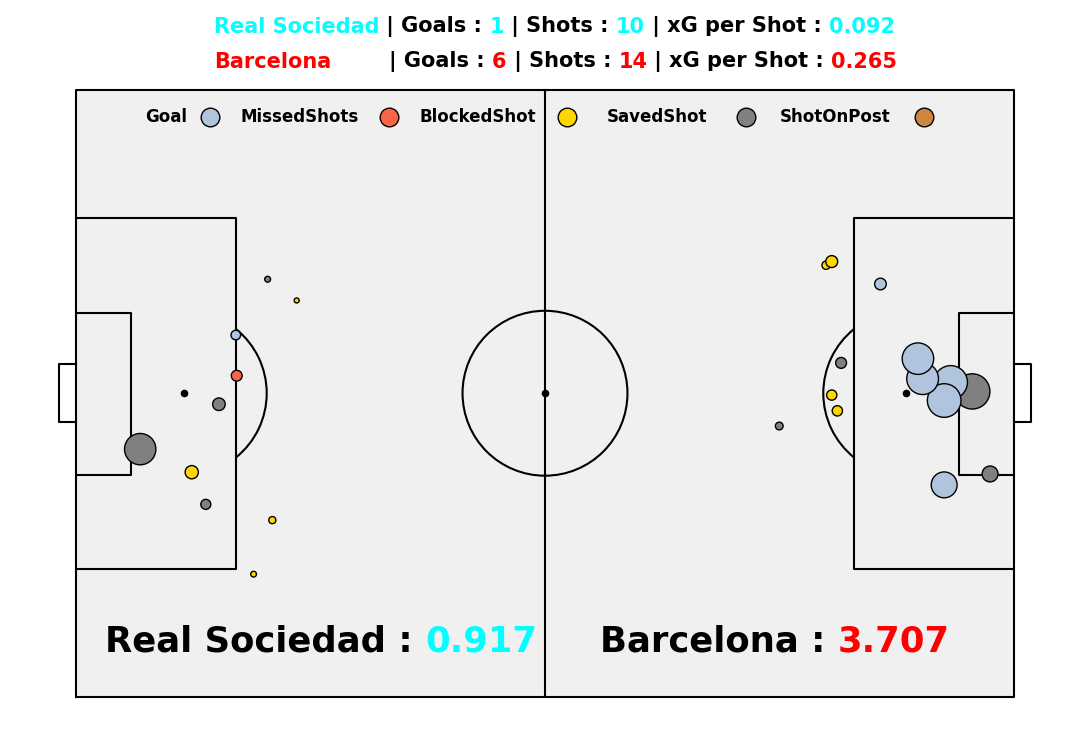

In [ ]:
fig, ax = plt.subplots(figsize=(11, 7))
#Drawing a full pitch horizontally
football_pitch(orientation="horizontal",aspect="full",line_color="black",ax=ax)

# Barcelona away team 
z_a = df_a['xG'].tolist()
z1 = [1000 * i for i in z_a] # This is to scale the "xG" values for plotting
colors = {'Goal':'lightsteelblue', 'MissedShots':'tomato', 'BlockedShot':'gold', 'SavedShot':'gray', 'ShotOnPost':'peru'}
## markers = {'Goal':'Star', 'MissedShots':'X', 'BlockedShot':'O', 'SavedShot':'V', 'ShotOnPost':'S'}
plt.scatter(y=df_a["Y"],x=df_a["X"],s=z1, marker='o',color=df_a['result'].map(colors),edgecolors="black")
plt.tight_layout()

# Real Sociedad  
z_h = df_h['xG'].tolist()
z2 = [1000 * i for i in z_h] # This is to scale the "xG" values for plotting
colors = {'Goal':'lightsteelblue', 'MissedShots':'tomato', 'BlockedShot':'gold', 'SavedShot':'gray', 'ShotOnPost':'peru'}
## markers = {'Goal':'Star', 'MissedShots':'X', 'BlockedShot':'O', 'SavedShot':'V', 'ShotOnPost':'S'}
plt.scatter(y=65-(df_h["Y"]),x=105-(df_h["X"]),s=z2, marker='o',color=df_h['result'].map(colors),edgecolors="black")
plt.tight_layout()

# text
# Sociedad
fig_text(0.199,1.04, s="<{}> | Goals : <{}> | Shots : <{}> | xG per Shot : <{}> ".format(h_team,goal_h,total_shots_h,xG_per_shot_h), fontsize = 15, fontweight = "bold",highlight_textprops=[{"color": 'cyan'}, {"color": 'cyan'}, {"color": 'cyan'},{"color": 'cyan'}])

# Barcelona
fig_text(0.199,.99, s="<{}>        | Goals : <{}> | Shots : <{}> | xG per Shot : <{}> ".format(a_team,goal_a,total_shots_a,xG_per_shot_a), fontsize = 15, fontweight = "bold",highlight_textprops=[{"color": 'red'}, {"color": 'red'}, {"color": 'red'},{"color": 'red'}])

# xG per team
fig_text(0.1,.17, s="{} : <{}> ".format(h_team,xGcum_h), fontsize = 25.5, fontweight = "bold",highlight_textprops=[{"color": 'cyan'}])
fig_text(0.55,.17, s="{} : <{}> ".format(a_team,xGcum_a), fontsize = 25.5, fontweight = "bold",highlight_textprops=[{"color": 'red'}])

# Scatter plot for goals, blocked shots, missed shots
plt.scatter(15,65,s=180, edgecolor="black",color='lightsteelblue')
plt.scatter(35,65,s=180, edgecolor="black",color='tomato')
plt.scatter(55,65,s=180, edgecolor="black",color='gold')
plt.scatter(75,65,s=180, edgecolor="black",color='gray')
plt.scatter(95,65,s=180, edgecolor="black",color='peru')
xx = [10,25,45,65,85]
yy = [65,65,65,65,65]
xx_yy = ['Goal', 'MissedShots', 'BlockedShot', 'SavedShot', 'ShotOnPost']
for i in range(len(xx)):
    plt.text(xx[i], yy[i], xx_yy[i], fontsize=12, color="black",ha="center", va="center",fontweight='bold')

In [ ]:
!pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 KB 2.6 MB/s eta 0:00:00


In [ ]:
from mplsoccer import VerticalPitch, Pitch
from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker
from mplsoccer.utils import FontManager

Let's once again scrape the data for Aleksander Isak : 

In [ ]:
# Entering Aleksander Isak ID link
link = "https://understat.com/player/5232"
res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')
# Get the grouped stats data, it's the second script executed in order
strings = scripts[3].string
# Getting rid of unnecessary characters from json data
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

shots = pd.DataFrame(data) # Aleksander Isak shot data
# Changing data type
shots['xG'] = shots['xG'].astype('float64')
shots['X'] = shots['X'].astype('float64')
shots['Y'] = shots['Y'].astype('float64')

shots['X1'] = (shots['X'])*100
shots['Y1'] = (shots['Y'])*100
# Original X and Y
shots['X'] = (shots['X'])*100
shots['Y'] = (shots['Y'])*100

# New dictionaries 
total_shots = shots[shots.columns[0]].count().tolist()
xGcum = np.round(max(np.cumsum(shots['xG'])),3).tolist()
xG_per_shot = np.round(max(np.cumsum(shots['xG']))/(shots[shots.columns[0]].count()),3).tolist()
goal = shots[shots['result']=='Goal']
shot_on_post = shots[shots['result']=='ShotOnPost']
blocked_shot = shots[shots['result']=='BlockedShot']
saved_shot = shots[shots['result']=='SavedShot']
missed_shot = shots[shots['result']=='MissedShot']
goals = goal[goal.columns[0]].count().tolist()

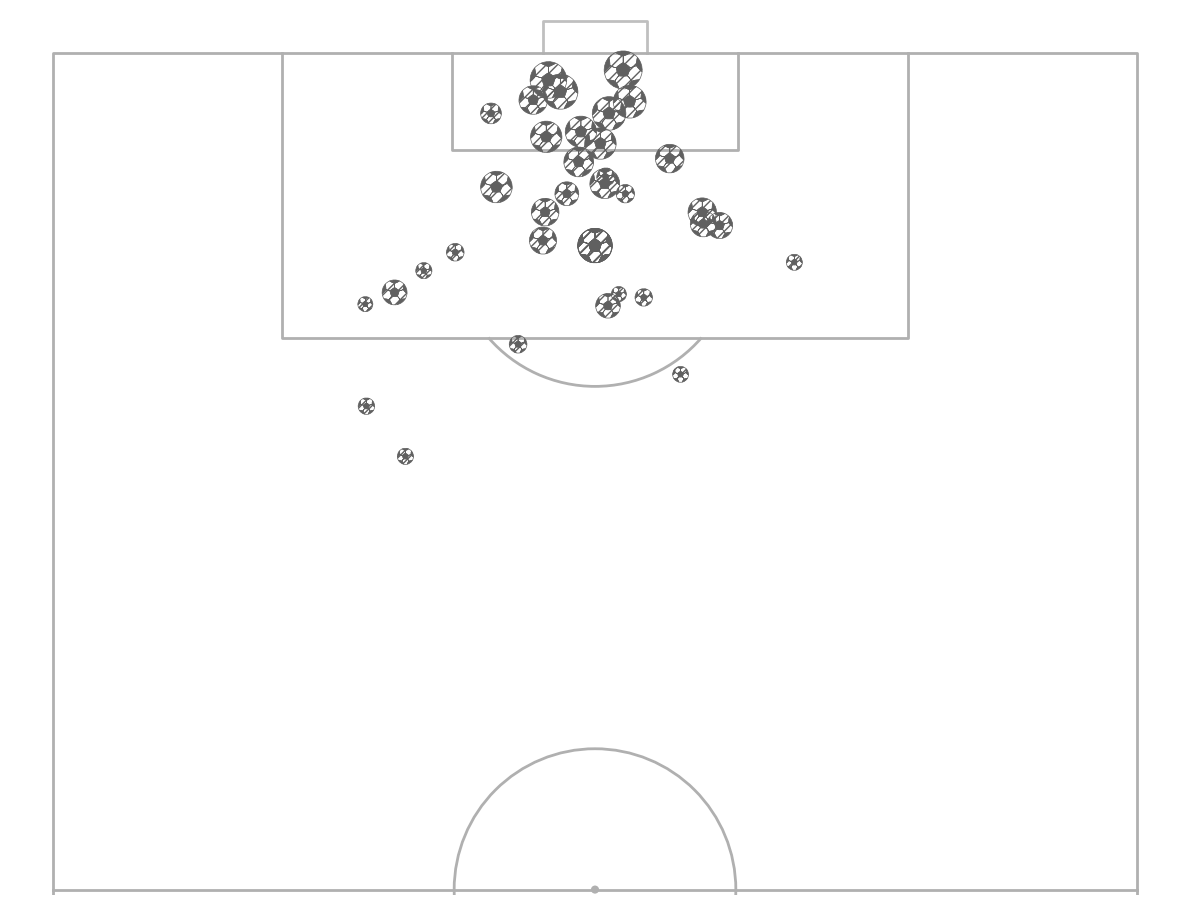

In [ ]:
pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8,
                      pitch_type='opta') # The measurements for Stats Perform are 105x68
# Main code
fig, ax = pitch.draw(figsize=(12, 10))

sc1 = pitch.scatter(goal['X'],
                    goal['Y'],
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='None',  # no facecolor for the markers
                    hatch='///',  # the all important hatch (triple diagonal lines)
                    s=(goal["xG"]* 720) + 100,
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='football',
                    ax=ax)


<a id="9.2"></a>
## Goals and misses for Aleksander Isak 

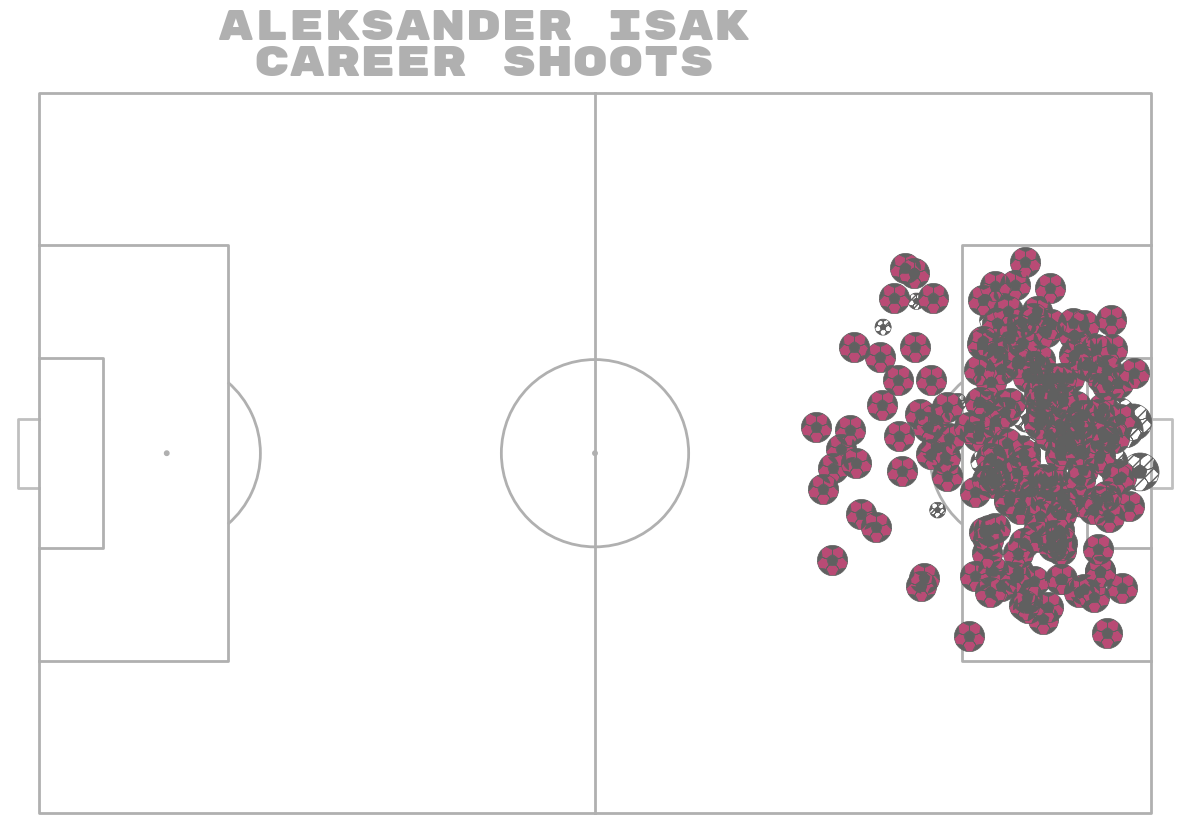

In [ ]:
pitch = Pitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # 
                      goal_type='box',
                      goal_alpha=0.8,
                      pitch_type='opta') # The measurements for Stats Perform are 105x68
# Main code
fig, ax = pitch.draw(figsize=(12, 10))

sc1 = pitch.scatter(goal['X'],
                    goal['Y'],
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='None',  # no facecolor for the markers
                    hatch='///',  # the all important hatch (triple diagonal lines)
                    s=(goal["xG"]* 720) + 100,
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='football',
                    ax=ax)
sc2 = pitch.scatter(shots[shots["result"]!='Goal']['X'] ,
                    shots[shots["result"]!='Goal']['Y'],
                    edgecolors='#606060',
                    c='#b94b75',
                    marker='football',
                    ax=ax
                    )

# Downloading the font from Github 
fm_rubik = FontManager(('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
                        'RubikMonoOne-Regular.ttf?raw=true'))

txt = ax.text(x=40, y=107, s='Aleksander Isak\nCareer Shoots',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties=fm_rubik.prop, color=pitch.line_color,
              va='center', ha='center')

<a id="9.3"></a>
## Match shots
Now let's scrape match shots data for a new shotmap using mpl soccer

In [ ]:
# Entering Real Sociedad vs Barcelona match link
link = "https://understat.com/match/15054"
res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')
# Get the shotsData, it's the second script executed in order
strings = scripts[1].string 
# Getting rid of unnecessary characters from json data
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

In [ ]:
df_h = pd.DataFrame(data['h'])
df_a = pd.DataFrame(data['a'])
df = df_h.append(df_a)

# Changing the data types 
df['xG'] = df['xG'].astype('float64')
df['X'] = df['X'].astype('float64')
df['Y'] = df['Y'].astype('float64')

# Adjusting the measurements 
df['X'] = (df['X'])*100
df['Y'] = (df['Y'])*100

# Dividing the df between away and home again
df_h = pd.DataFrame(df[df['h_a']=='h'])
df_a = pd.DataFrame(df[df['h_a']=='a'])

# xG for each team
# Sociedad
total_shots_h = df_h[df_h.columns[0]].count()
xGcum_h = np.round(max(np.cumsum(df_h['xG'])),3)
xG_per_shot_h = np.round(max(np.cumsum(df_h['xG']))/(df_h[df_h.columns[0]].count()),3)
goal_h = df_h[df_h['result']=='Goal']
goal_h = goal_h[goal_h.columns[0]].count()
h_team = df['h_team'].iloc[0]
# Barcelona 
# xG for each team
total_shots_a = df_a[df_a.columns[0]].count().tolist()
xGcum_a = np.round(max(np.cumsum(df_a['xG'])),3).tolist()
xG_per_shot_a = np.round(max(np.cumsum(df_a['xG']))/(df_a[df_a.columns[0]].count()),3).tolist()
goal_a = df_a[df_a['result']=='Goal']
goal_a = goal_a[goal_a.columns[0]].count().tolist()
a_team = df['a_team'].iloc[0]

<ipython-input-24-b15d3ec3895d>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_h.append(df_a)


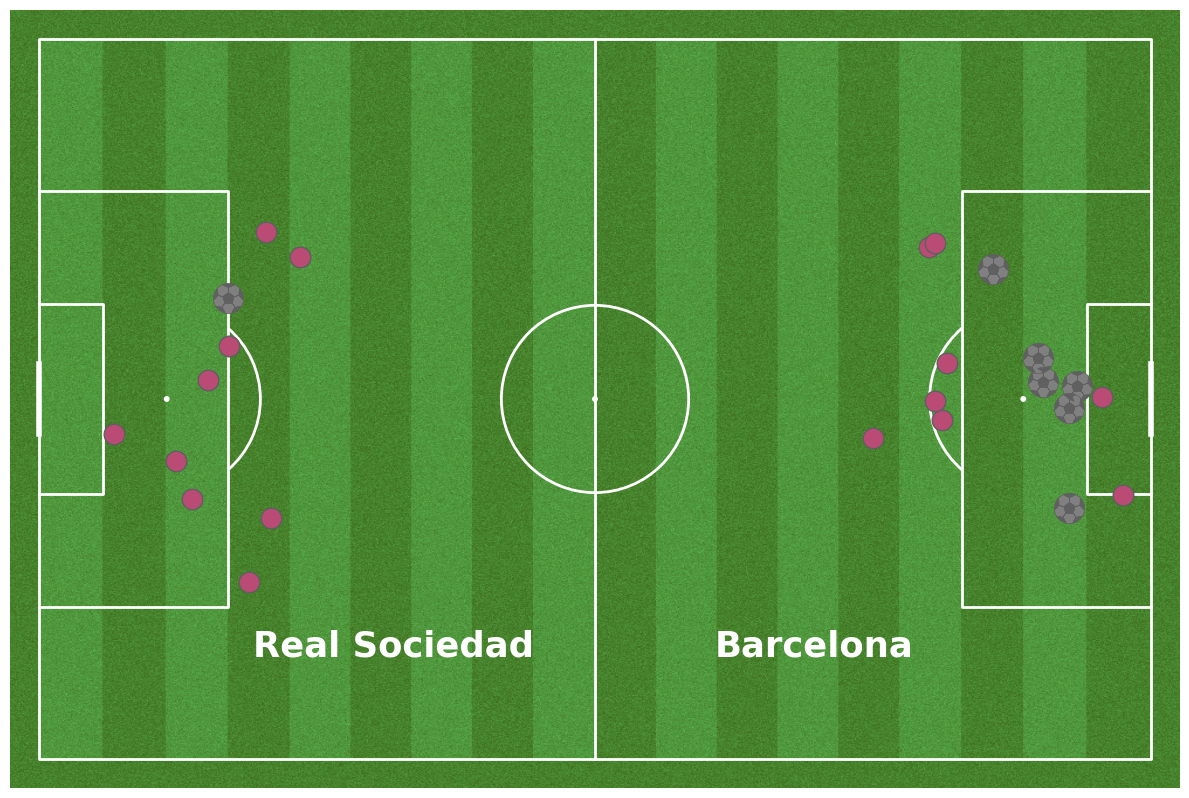

In [ ]:
pitch = Pitch(pitch_color='grass', line_color='white',
              stripe=True,pitch_type='opta')  # optional stripes

fig, ax = pitch.draw(figsize=(12, 10))

# FC Barcelona 
# No goals
sc1_a = pitch.scatter(df_a[df_a["result"]!='Goal']['X'] ,
                    df_a[df_a["result"]!='Goal']['Y'],
                    edgecolors='#606060',
                    c='#b94b75',
                    marker='o',
                    ax=ax,
                    s=220
                    )
# Goals
sc2_a = pitch.scatter(df_a[df_a["result"]=='Goal']['X'] ,
                    df_a[df_a["result"]=='Goal']['Y'],
                    edgecolors='#606060',
                    c='gray',
                    marker='football',
                    ax=ax
                    )

# Real Sociedad 
# No goals
sc1_a = pitch.scatter(100-(df_h[df_h["result"]!='Goal']['X']) ,
                    100-(df_h[df_h["result"]!='Goal']['Y']),
                    edgecolors='#606060',
                    c='#b94b75',
                    marker='o',
                    ax=ax,
                    s=220
                    )
# Goals
sc1_a = pitch.scatter(100-(df_h[df_h["result"]=='Goal']['X']) ,
                    100-(df_h[df_h["result"]=='Goal']['Y']),
                    edgecolors='#606060',
                    c='gray',
                    marker='football',
                    ax=ax
                    )
fig_text(0.6,.27, s="Barcelona", fontsize = 25.5, fontweight = "bold",c='white')
fig_text(0.215,.27, s="Real Sociedad", fontsize = 25.5, fontweight = "bold",c='white')